In [1]:
import networkx as nx
import srsly
import matplotlib.pyplot as plt
from pyvis.network import Network
from IPython.display import HTML, display
from tqdm import tqdm
import pandas as pd
from math import log
%matplotlib inline

In [2]:
import math
math.sqrt(4)

2.0

In [4]:
db = list(srsly.read_jsonl('data/snomed_db.jsonl'))
len(db)

2212

**Get a node**

In [5]:
def getConceptById(id):
    for c in db:
        if c['conceptId'] == id:
            return c

def getConceptByName(name):
    for c in db:
        if c['fsn']['term'] == name:
            return c

In [6]:
def getNeighborConceptsByName(name):
    node = getConceptByName(name) # get a concept by its id

    for i, r in enumerate(node['relationships']):
        if r['characteristicType'] == 'STATED_RELATIONSHIP':
            print(f"{i}\t| {r['target']['id']}\t| {r['target']['fsn']['term']}")
            print(f"\t\t\t  {r['characteristicType']}")
            print()
    

In [7]:
id = 193576003
node = getConceptById(str(id)) # get a concept by its id
node['fsn']['term']

'Cortical cataract (disorder)'

In [7]:
name = 'Hereditary retinal dystrophy (disorder)'
getNeighborConceptsByName(name)

5	| 363343008	| Hereditary disorder of the visual system (disorder)
			  STATED_RELATIONSHIP

6	| 314407005	| Retinal dystrophy (disorder)
			  STATED_RELATIONSHIP

8	| 5665001	| Retinal structure (body structure)
			  STATED_RELATIONSHIP



In [8]:
node = getConceptByName(name)
node

{'conceptId': '41799005',
 'fsn': {'term': 'Hereditary retinal dystrophy (disorder)', 'lang': 'en'},
 'pt': {'term': 'Hereditary retinal dystrophy', 'lang': 'en'},
 'active': True,
 'effectiveTime': '20020131',
 'released': True,
 'releasedEffectiveTime': 20020131,
 'moduleId': '900000000000207008',
 'definitionStatus': 'PRIMITIVE',
 'descriptions': [{'active': True,
   'moduleId': '900000000000207008',
   'released': True,
   'releasedEffectiveTime': 20170731,
   'descriptionId': '778627018',
   'term': 'Hereditary retinal dystrophy (disorder)',
   'conceptId': '41799005',
   'typeId': '900000000000003001',
   'acceptabilityMap': {'900000000000509007': 'PREFERRED',
    '900000000000508004': 'PREFERRED'},
   'type': 'FSN',
   'caseSignificance': 'CASE_INSENSITIVE',
   'lang': 'en',
   'effectiveTime': '20170731'},
  {'active': False,
   'moduleId': '900000000000207008',
   'released': True,
   'releasedEffectiveTime': 20020131,
   'descriptionId': '69729011',
   'term': 'Hereditary ret

In [9]:
ids = [c['conceptId'] for c in db]

In [ ]:
names = [c['pt']['term'] for c in db]
names

In [ ]:
name_filt = [n for n in names if 'disease' in n]
name_filt

**Get neighbors of a node**

In [ ]:
for i, r in enumerate(node['relationships']):
    if r['characteristicType'] == 'STATED_RELATIONSHIP':
        print(f"{i}\t| {r['target']['id']}\t| {r['target']['fsn']['term']}")
        print(f"\t\t\t  {r['characteristicType']}")
        print()

**Graph basics**

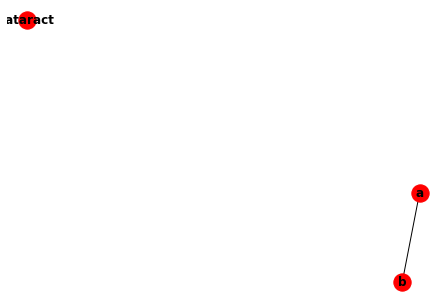

In [8]:
# Undirected graph
G = nx.Graph()
G.add_node('cataract')
G.add_edge('a', 'b')
nx.draw(G, with_labels=True, font_weight='bold', node_color='red')
plt.show()

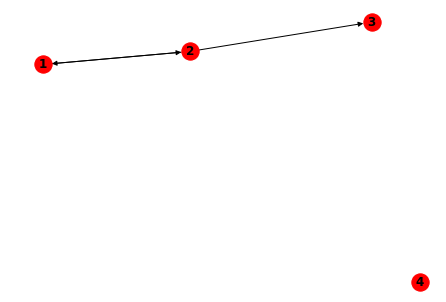

In [9]:
# Directed graph
G = nx.DiGraph()
G.add_nodes_from([1, 2, 3, 4])
G.add_edges_from([(1, 2), (2, 1), (2, 3)])
nx.draw(G, with_labels=True, font_weight='bold', node_color='red')

In [10]:
# Change graph properties
'''
options = {
    'node_color': 'black',
    'node_size': 100,
    'width': 3,
}
subax1 = plt.subplot(221)
nx.draw_random(G, **options)
'''

"\noptions = {\n    'node_color': 'black',\n    'node_size': 100,\n    'width': 3,\n}\nsubax1 = plt.subplot(221)\nnx.draw_random(G, **options)\n"

**Plot a node and its closest neighbors**

In [11]:
id = 193576003
node = getConceptById(str(id)) # get a concept by its id
root = node['fsn']['term']

G = nx.DiGraph()
for i, r in enumerate(node['relationships']):
    if r['characteristicType'] == 'STATED_RELATIONSHIP':
        child = r['target']
        child_id = child['id']
        #child_name = child['fsn']['term'] # chose 'fsn' or 'pt'
        child_name = child['pt']['term']
        
        # print info
        print(f"{i}\t| {child_id}\t| {child_name}")
        print(f"\t\t\t  {r['characteristicType']}")
        print()
        
        # Construct graph
        G.add_edges_from([(root,child_name)])

3	| 193570009	| Cataract
			  STATED_RELATIONSHIP

6	| 33347001	| Structure of cortex of lens
			  STATED_RELATIONSHIP

9	| 128305008	| Opacity
			  STATED_RELATIONSHIP

11	| 128306009	| Cataract
			  STATED_RELATIONSHIP



<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

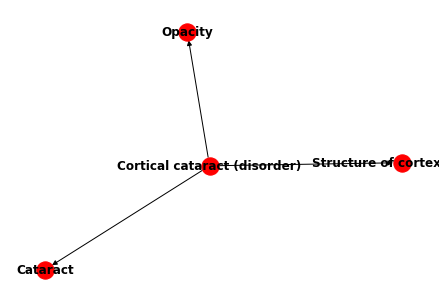

In [12]:
options = {
    'node_color': 'black',
    'node_size': 100,
    'width': 3,
}
nx.draw(G, with_labels=True, font_weight='bold', node_color='red')
plt.plot

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

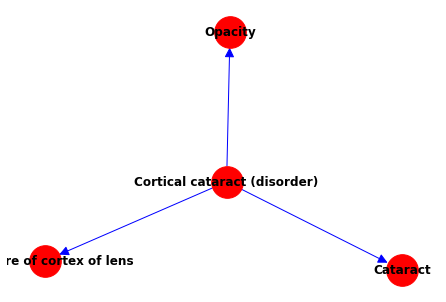

In [13]:
options = {
    'with_labels': True,
    'font_weight':'bold',
    'node_color': 'red',
    'node_size': 1000,
    'width': 1,
    'edge_color':'b', 
    'arrowsize':20
}
nx.draw(G, **options)
plt.plot

**Interactive graph**

In [28]:
g = Network(height=800, width=800, directed=True, notebook=True)
#g.toggle_hide_edges_on_drag(True)
#g.barnes_hut() # use this particular physics solver
g.from_nx(G)
g.get_node('Opacity')['color'] = '#dd4b39'
print(g.get_node('Opacity')['size'])
g.get_node('Opacity')['size'] /= 2
print(g.get_node('Opacity')['size'])
g.show('snomed.html')

10
5.0


In [31]:
df.tail()

NameError: name 'df' is not defined

In [29]:
html = g.generate_html()

In [30]:
html

'<html>\n<head>\n<link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/vis-network@latest/styles/vis-network.css" type="text/css" />\n<script type="text/javascript" src="https://cdn.jsdelivr.net/npm/vis-network@latest/dist/vis-network.min.js"> </script>\n<center>\n<h1></h1>\n</center>\n\n<!-- <link rel="stylesheet" href="../node_modules/vis/dist/vis.min.css" type="text/css" />\n<script type="text/javascript" src="../node_modules/vis/dist/vis.js"> </script>-->\n\n<style type="text/css">\n\n        #mynetwork {\n            width: 800;\n            height: 800;\n            background-color: #ffffff;\n            border: 1px solid lightgray;\n            position: relative;\n            float: left;\n        }\n\n        \n\n        \n\n        \n</style>\n\n</head>\n\n<body>\n<div id = "mynetwork"></div>\n\n\n<script type="text/javascript">\n\n    // initialize global variables.\n    var edges;\n    var nodes;\n    var network; \n    var container;\n    var options, data;\n\n    \n 

In [26]:
g.nodes

[{'size': 10,
  'id': 'Cortical cataract (disorder)',
  'label': 'Cortical cataract (disorder)',
  'shape': 'dot'},
 {'size': 10, 'id': 'Cataract', 'label': 'Cataract', 'shape': 'dot'},
 {'size': 10,
  'id': 'Structure of cortex of lens',
  'label': 'Structure of cortex of lens',
  'shape': 'dot'},
 {'size': 50,
  'id': 'Opacity',
  'label': 'Opacity',
  'shape': 'dot',
  'color': '#dd4b39'}]

In [ ]:
g.get_nodes()

In [ ]:
g.get_node('Opacity')

In [ ]:
g.get_node('Opacity')['color'] = '#00ff1e'

In [ ]:
d = dict(G.degree)
d

In [ ]:
scale = 10
d.update((x, scale*y) for x, y in d.items() if y > 1)

#Setting up size attribute
nx.set_node_attributes(G, d, 'size')

In [ ]:
g = Network(height='800px', width="100%",bgcolor="#222222",font_color="white",directed=True, notebook=True)
#g = Network(height=800, width=800, directed=True, notebook=True)

#g.toggle_hide_edges_on_drag(True)
#g.barnes_hut(spring_length=10) # use this particular physics solver
#g.from_nx(G, node_size_transf=d)
g.from_nx(G)
g.show('snomed.html')

In [ ]:
G = nx.DiGraph()
for id in tqdm(ids):
    node = getConceptById(str(id)) # get a concept by its id
    root = node['fsn']['term']

    for i, r in enumerate(node['relationships']):
        if r['characteristicType'] == 'STATED_RELATIONSHIP':
            child = r['target']
            child_id = child['id']
            #child_name = child['fsn']['term'] # chose 'fsn' or 'pt'
            child_name = child['pt']['term']

            # print info
            #print(f"{i}\t| {child_id}\t| {child_name}")
            #print(f"\t\t\t  {r['characteristicType']}")
            #print()

            # Construct graph
            G.add_edges_from([(root,child_name)])

In [ ]:
g = Network(height=800, width=800, directed=True, notebook=True)
g.toggle_hide_edges_on_drag(True)
g.barnes_hut() # use this particular physics solver
g.from_nx(G)
g.show('snomed.html')

In [ ]:
G.number_of_nodes()

**Exlude nonrelevant node**

In [ ]:
G1 = nx.DiGraph()
for id in tqdm(ids):
    node = getConceptById(str(id)) # get a concept by its id
    root = node['fsn']['term']

    for i, r in enumerate(node['relationships']):
        if r['characteristicType'] == 'STATED_RELATIONSHIP':
            child = r['target']
            child_id = child['id']
            #child_name = child['fsn']['term'] # chose 'fsn' or 'pt'
            child_name = child['pt']['term']

            # print info
            #print(f"{i}\t| {child_id}\t| {child_name}")
            #print(f"\t\t\t  {r['characteristicType']}")
            #print()

            # Construct graph
            if child['conceptId'] in ids:
                G1.add_edges_from([(root,child_name)])

In [ ]:
ids[:5]

In [ ]:
g1 = Network(height=800, width=800, directed=True, notebook=True)
g1.toggle_hide_edges_on_drag(True)
g1.barnes_hut() # use this particular physics solver
g1.from_nx(G1)
g1.show('snomed1.html')

In [ ]:
G1.number_of_nodes()

In [ ]:
for name in list(G1.nodes()):
    if 'Hereditary' in name:
        print(name)

In [ ]:
for name in list(G1.nodes()):
    if 'Choroideremia' in name:
        print(name)

**Rescale nodes**

In [ ]:
d = dict(G1.degree)
scale = 3
d_scaled = d.copy()
d_scaled.update((x, scale*y) for x, y in d.items() if y > 1)

#Setting up size attribute
nx.set_node_attributes(G1, d_scaled, 'size')

In [ ]:
g1 = Network(height=1000, width='100%', directed=True, notebook=True)
#g1.toggle_hide_edges_on_drag(True)
#g1.barnes_hut() # use this particular physics solver
g1.from_nx(G1)
g1.get_node('Hereditary retinal dystrophy')['color'] = '#dd4b39'
g1.show('snomed1.html')

In [ ]:
g1.get_node('Hereditary retinal dystrophy')

In [ ]:
g1.get_node('Hereditary retinal dystrophy')['color']='r'

In [ ]:
g1.get_node('Hereditary retinal dystrophy')

In [ ]:
G1.nodes()

In [ ]:
names = list(G1.nodes())
names

In [ ]:
name_filt = [n for n in names if 'disease' in n]
name_filt

In [ ]:
d_sorted = {k: v for k, v in sorted(d.items(), key=lambda item: item[1], reverse=True)}

In [ ]:
d_sorted

In [ ]:
d_scaled

### Node size = freq

In [34]:
df = pd.read_csv('data/snomed_id2name.csv')

In [35]:
df

,smid,freq,smname
0,53889007,61523,Nuclear cataract
1,193570009,58307,Cataract
2,193576003,20511,Cortical cataract
3,315353005,13498,Posterior subcapsular cataract
4,95217000,12924,Pseudophakia
...,...,...,...
2232,232088004,1,Ghost cell glaucoma
2233,26889001,1,Myositis
2234,193293002,1,Old intraocular magnetic foreign body
2235,312944002,1,Compressive optic atrophy


In [39]:
max(list(df.freq.values))

61523

In [12]:
df['fullname'] = None

In [40]:
df[:5]

,smid,freq,smname
0,53889007,61523,Nuclear cataract
1,193570009,58307,Cataract
2,193576003,20511,Cortical cataract
3,315353005,13498,Posterior subcapsular cataract
4,95217000,12924,Pseudophakia


In [13]:
for i in range(len(df)):
    id = df.loc[i, 'smid']
    c = getConceptById(str(id))
    if c:
        df.loc[i, 'fullname'] = c['fsn']['term']
df.head()

,smid,freq,smname,fullname
0,53889007,61523,Nuclear cataract,Nuclear cataract (disorder)
1,193570009,58307,Cataract,Cataract (disorder)
2,193576003,20511,Cortical cataract,Cortical cataract (disorder)
3,315353005,13498,Posterior subcapsular cataract,Posterior subcapsular cataract (disorder)
4,95217000,12924,Pseudophakia,Pseudophakia (disorder)


In [ ]:
f = {row['fullname']:row['freq'] for _, row in df.iterrows()}

In [ ]:
f

In [ ]:
f_scaled = f.copy()
f_scaled.update((x, y**(1/2)) for x, y in f.items() if y > 1)
nx.set_node_attributes(G1, f_scaled, 'size')

In [ ]:
g1 = Network(height=1000, width='100%', directed=True, notebook=True)
#g1.toggle_hide_edges_on_drag(True)
#g1.barnes_hut() # use this particular physics solver
g1.from_nx(G1)
g1.get_node('Hereditary retinal dystrophy')['color'] = '#dd4b39'
g1.show('snomed2.html')

In [ ]:
f_scaled

### Node size = word count

In [46]:
df2 = pd.read_csv('data/snomed_mean_word_count.csv', names=['fullname', 'wc'], header=0).sort_values(by='wc', ascending=False)

In [47]:
df2

,fullname,wc
2079,Ghost cell glaucoma (disorder),448.000000
1993,Paralytic strabismus (disorder),420.000000
494,Malignant melanoma of ciliary body (disorder),381.130435
1773,Stenosis of retinal artery (disorder),380.000000
1569,Ring melanoma of ciliary body (disorder),358.500000
...,...,...
1724,Persistent miosis (disorder),30.000000
1354,Congenitally small punctum lacrimale (disorder),29.333333
1798,Neoplasm of uncertain behavior of choroid (dis...,25.000000
2178,Acquired peripheral telangiectasia (disorder),17.000000


In [ ]:
wc = {row['fullname']:row['wc'] for _, row in df2.iterrows()}
wc_sorted = {k: v for k, v in sorted(wc.items(), key=lambda item: item[1], reverse=True)}
wc_sorted

In [ ]:
wc_scaled = wc_sorted.copy()
wc_scaled.update((x, y/4) for x, y in wc_sorted.items() if y > 1)
nx.set_node_attributes(G1, wc_scaled, 'size')

In [ ]:
rare = [
    'Hereditary retinal dystrophy',
    'Hereditary macular dystrophy',
    'Hereditary retinal dystrophy (disorder)',
    'Hereditary optic atrophy',
    'Hereditary macular dystrophy (disorder)',
    'Hereditary retinal dystrophy (disorder)',
    'X-linked retinitis pigmentosa heterozygote (disorder)',
    'X-linked retinitis pigmentosa (disorder)',
    'Retinitis pigmentosa (disorder)',
    'Hereditary retinal dystrophy (disorder)']
rare.extend([i for i in list(g1.neighbors('Hereditary retinal dystrophy'))])


# 'Choroideremia (disorder)',

In [ ]:
g1 = Network(height=1000, width='100%', notebook=True)
#g1.toggle_hide_edges_on_drag(True)
#g1.barnes_hut() # use this particular physics solver
g1.from_nx(G1)

rare.extend([i for i in list(g1.neighbors('Hereditary retinal dystrophy'))])
rare.extend([i for i in list(g1.neighbors('Retinitis pigmentosa'))])
rare.extend([i for i in list(g1.neighbors('Hereditary macular dystrophy'))])


for r in rare:
    g1.get_node(r)['color'] = '#dd4b39'

In [ ]:
g1.show('snomed_wc.html')

In [ ]:
g1.get_node('Hereditary retinal dystrophy')

In [ ]:
list(g1.neighbors('Hereditary retinal dystrophy'))

### Check overlapping between Tina's and my snomed names

In [74]:
df = pd.read_csv('retrieved/snomed_id2name.csv') # frequency
df['fullname'] = None
for i in range(len(df)):
    id = df.loc[i, 'smid']
    c = getConceptById(str(id))
    if c:
        df.loc[i, 'fullname'] = c['fsn']['term']
df.head()

df2 = pd.read_csv('snomed_mean_word_count.csv', names=['fullname', 'wc'], header=0) # word count

In [75]:
names = [c['fsn']['term'] for c in db]
len(names)

2212

In [76]:
names[:5]

['Vitreoretinal degeneration (disorder)',
 'Hemangioma of choroid (disorder)',
 'Autosomal recessive ocular albinism (disorder)',
 'Cataract secondary to ocular disease (disorder)',
 'Pterygium (disorder)']

In [77]:
tinas = list(df2.fullname)
len(tinas)

2237

In [78]:
tinas[:5]

['Nuclear cataract (disorder)',
 'Cataract (disorder)',
 'Cortical cataract (disorder)',
 'Posterior subcapsular cataract (disorder)',
 'Pseudophakia (disorder)']

In [79]:
freq = list(df.fullname)
len(freq)

2237

In [80]:
freq[:5]

['Nuclear cataract (disorder)',
 'Cataract (disorder)',
 'Cortical cataract (disorder)',
 'Posterior subcapsular cataract (disorder)',
 'Pseudophakia (disorder)']

In [81]:
diff = set(freq).difference(set(tinas))
len(diff)

131

In [82]:
list(diff)[:5]

['Congenital cyst of conjunctiva (disorder)',
 'Severe nonproliferative retinopathy with clinically significant macular edema co-occurrent and due to diabetes mellitus (disorder)',
 'Giant papillary conjunctivitis caused by contact lens (disorder)',
 'Corneal incision leaking (finding)',
 'Removal of conjunctival sutures (procedure)']

In [83]:
diff = set(tinas).difference(set(freq))
len(diff)

155

In [84]:
inter = set(freq).intersection(set(tinas))
len(inter)

2082

In [85]:
df_rm = df[df['freq'] > 1 ]
len(df_rm)

1681

In [86]:
inter = set(df_rm.fullname).intersection(set(tinas))
len(inter)

1556

In [87]:
list(inter)[:5]

['Nuclear sclerotic cataract (disorder)',
 'Divergent concomitant strabismus (disorder)',
 'Secondary angle-closure glaucoma with pupil block (disorder)',
 'Pseudocoloboma of iris (disorder)',
 'Exotropia (disorder)']

In [88]:
G1 = nx.Graph()
scale = 1/4
for id in tqdm(ids):
    node = getConceptById(str(id)) # get a concept by its id
    root = node['fsn']['term']
    if root not in list(inter):
        continue
        
    G1.add_node(root, label=node['pt']['term'], title=node['pt']['term'], 
                size=df2.loc[df2.fullname==root, 'wc'].values[0]*scale)
    
    for i, r in enumerate(node['relationships']):
        if r['characteristicType'] == 'STATED_RELATIONSHIP':
            child = r['target']
            child_id = child['id']
            #child_name = child['fsn']['term'] # chose 'fsn' or 'pt'
            child_name = child['fsn']['term']

            # print info
            #print(f"{i}\t| {child_id}\t| {child_name}")
            #print(f"\t\t\t  {r['characteristicType']}")
            #print()

            # Construct graph
            if child_name in list(inter):
                G1.add_node(child_name, label=child['pt']['term'], title=child['pt']['term'],
                            size=df2.loc[df2.fullname==child_name, 'wc'].values[0]*scale)
                G1.add_edge(root,child_name)

100%|██████████| 2212/2212 [00:02<00:00, 1002.11it/s]


In [89]:
print(G1.number_of_nodes())
print(G1.number_of_edges())

1556
1340


**With colours**

In [101]:
def coloring(node_list, color, g):
    node_list_out = node_list.copy()

    for n in node_list:    
        node_list_out.extend([i for i in list(g.neighbors(n)) if i not in node_list_out])

    for n in node_list_out:
        g.get_node(n)['color'] = color

In [123]:
g1 = Network(height=1500, width='100%', notebook=True)
#g1.toggle_hide_edges_on_drag(True)
#g1.barnes_hut(spring_length=1, damping=0.6, overlap=0.6) # use this particular physics solver
g1.from_nx(G1)
#g1.get_node('Hereditary retinal dystrophy')['color'] = '#dd4b39'''


In [124]:
# coloring

# ------ rare diseases---------
rare = [
    'Hereditary macular dystrophy (disorder)',
    'Hereditary retinal dystrophy (disorder)',
    'X-linked retinitis pigmentosa (disorder)',
    'Retinitis pigmentosa (disorder)',
    "Oguchi's disease (disorder)",
    'Congenital hereditary endothelial dystrophy (disorder)', 
    'Dominant hereditary optic atrophy (disorder)']
coloring(rare, '#dd4b39', g1) # red

    
# ------- Cataract -----------
cata = [
    'Cataract (disorder)', 'Congenital cataract (disorder)',
    'Subcapsular cataract (disorder)']
coloring(cata, '#eb34bd', g1) # magneta


# ------- glaucoma -----------
glau = [
    'Glaucoma (disorder)', 'Secondary glaucoma (disorder)',
    'Open-angle glaucoma (disorder)', 'Primary angle-closure glaucoma (disorder)']
coloring(glau, '#00ff1e', g1) # green

    
# ------- infect -----------
infe = [
    'Uveitis (disorder)',
    'Conjunctivitis (disorder)', 'Viral conjunctivitis (disorder)',
    'Keratitis (disorder)', 'Scleritis (disorder)', 'Keratoconjunctivitis (disorder)', 'Varicella (disorder)',
    'Chorioretinitis (disorder)', 'Retinitis (disorder)', 'Iritis (disorder)']
coloring(infe, '#162347', g1) # black

In [125]:
g1.show('snomed2.html')

In [ ]:
g1.nodes

In [41]:
list(g1.neighbors('X-linked retinitis pigmentosa (disorder)'))

['Retinitis pigmentosa (disorder)']

In [92]:
g1.get_node("Oguchi's disease (disorder)")

{'title': "Oguchi's disease",
 'size': 86,
 'id': "Oguchi's disease (disorder)",
 'label': "Oguchi's disease",
 'shape': 'dot',
 'color': '#dd4b39'}

In [108]:
for n in g1.nodes:
    if "glaucoma" in n['id']:
        print(n['id'])

Secondary glaucoma (disorder)
Angle recession glaucoma (disorder)
Secondary glaucoma due to combination mechanisms (disorder)
Secondary open-angle glaucoma (disorder)
Secondary angle-closure glaucoma (disorder)
Acute-on-chronic glaucoma (disorder)
Angle-closure glaucoma (disorder)
Anatomical narrow angle glaucoma (disorder)
Acute angle-closure glaucoma (disorder)
Borderline glaucoma (disorder)
Primary congenital glaucoma (disorder)
Open-angle glaucoma (disorder)
Absolute glaucoma (disorder)
Low tension glaucoma (disorder)
Primary angle-closure glaucoma (disorder)
Primary angle-closure glaucoma residual stage (disorder)
Open-angle glaucoma - borderline (disorder)
Steroid-induced glaucoma - borderline (disorder)
Angle-closure glaucoma - borderline (disorder)
Neovascular glaucoma (disorder)
Phacomorphic glaucoma (disorder)
Secondary angle-closure glaucoma - synechial (disorder)
Secondary angle-closure glaucoma with pupil block (disorder)
Malignant glaucoma (disorder)
Phacolytic glaucoma (

In [120]:
for n in g1.nodes:
    if "inherited" in n['id']:
        print(n['id'])